# Preliminary operation and Import Packages

2.9 version of TensorFlow/Keras, because some data augmentation techniques are particularly slow

In [4]:
import cv2

import os
import glob2 as glob
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [112]:
# Set visualization size for figures 
plt.rcParams['figure.figsize'] = [10,10] # width, height

# Dataframe exploration

The `COVID-NET` team have costructed the `COVIDx CXR-3` dataset from the following publicly available data sources:

-   `covid-chestxray-dataset`
    -   https://github.com/ieee8023/covid-chestxray-dataset, 2020
    -   Multiple Licenses: Apache 2.0, Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0), Attribution 4.0 International (CC BY 4.0)

-   `Figure 1 COVID-19 Chest X-ray Dataset Initiative`
    -   License: GNU General Public License (GPLv3)


-   `Actualmed COVID-19 Chest X-ray Dataset Initiative`
    -   License: GNU General Public License (GPLv3)


-   `COVID-19 Radiography Database - Version 3`
    -   Note: We only use the COVID-19 images from Version 3 of this dataset
    -   Multiple Licenses: Attribution 3.0 Unported (CC BY 3.0), Attribution 4.0 International (CC BY 4.0), Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)


-   `RSNA Pneumonia Detection Challenge`
    -   Data is originally from: https://nihcc.app.box.com/v/ChestXray-NIHCC
    -   License: Terms of Use and Attribution


-   `RSNA International COVID-19 Open Radiology Database (RICORD)`
    -   License: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)


-   `BIMCV-COVID19+: a large annotated dataset of RX and CT images of COVID19 patients`
    -   License:Data Research Use Agreement


-   `Stony Brook University COVID-19 Positive Cases (COVID-19-NY-SBU)`
    -   License:TCIA Data Usage Policy, Creative Commons Attribution 4.0 International License


The whole dataset is available at the following link https://github.com/rmarconzini/COVID-Net

## Training Set

The training dataset consists of 30140 images divided into 3 classes:
-   `COVID-19`: 16490 images
-   `Normal` (no pathology) : 8085 images
-   `Pneumonia`: 5555 images

The `COVIDx` dataset was built by the `COVID-Net` team and is the set of X-ray images from 8 different datasets. Specifically, the source is indicated for each image:
-   `stonybrook`: 14132 images 
-   `rsna`:13389 images
-   `sirm`: 943 images
-   `ricord`: 896 images
-   `cohen`: 322 images
-   `bimcv`: 200 images
-   `rnsa`: 199 images
-   `actmed`: 25 images
-   `fig1`: 24 images

The various sources are described above

In [22]:
# Set the directory where the label  is stored

path = 'C:/Users/marco/Desktop/Local_Documents/data/COVIDx-nosplit'
os.chdir(path=path)

In [17]:
os.getcwd()

'C:\\Users\\marco\\Desktop\\Local_Documents\\data\\COVIDx-nosplit-resized-112'

We import txt files describing the classes to which the various images belong

In [30]:
# Import annotation (train, test)
train_label =pd.read_csv('.\\train_COVIDx9A.txt', sep = ' ', header=None)
test_label = pd.read_csv('.\\test_COVIDx9A.txt', sep= ' ', header=None)

In [31]:
# Set column names and remove unnecessary ones

train_label.columns=['patient id', 'img_path', 'label', 'data source']
test_label.columns=['patient id', 'img_path', 'label', 'data source']

In [7]:
train_label.head(5)

,patient id,img_path,label,data source
0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,cohen
1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,cohen
2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,cohen
3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,cohen
4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,cohen


In [15]:
train_label.shape

(30130, 4)

In [25]:
train_label['label'].value_counts()

COVID-19     16490
normal        8085
pneumonia     5555
Name: label, dtype: int64

In [27]:
train_label['data source'].value_counts()

stonybrook    14132
rsna          13389
sirm            943
ricord          896
cohen           322
bimcv           200
rnsa            199
actmed           25
fig1             24
Name: data source, dtype: int64

<AxesSubplot: xlabel='label', ylabel='Count'>

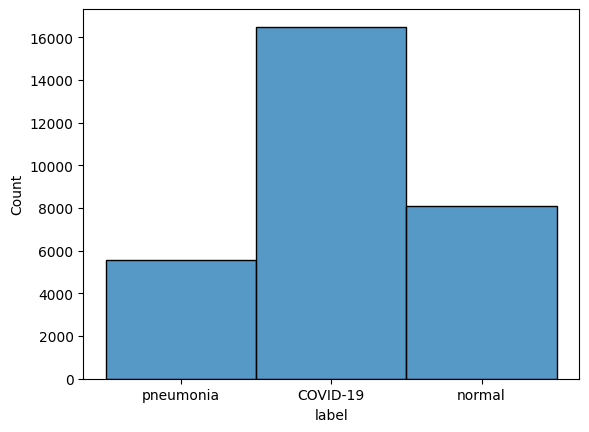

In [ ]:
sns.histplot(train_label['label'], discrete=True)

## Test set

The test dataset consists of 400 images divided into 3 classes:
-   `COVID-19`: 200 images
-   `Normal` (no pathology) : 100 images
-   `Pneumonia`: 100 images

The sources of the  `COVIDx` test-set are: 
-   `rsna`: 200 images
-   `ricord`: 200 images


The test dataset was constructed for the following challenge and will later be used to validate the results obtained.
https://www.kaggle.com/competitions/rsna-pneumonia-detection-challenge/overview

In [10]:
test_label.head(5)

,patient id,img_path,label,data source
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,COVID-19,ricord
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,COVID-19,ricord
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,COVID-19,ricord
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,COVID-19,ricord
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,COVID-19,ricord


<AxesSubplot: xlabel='label', ylabel='Count'>

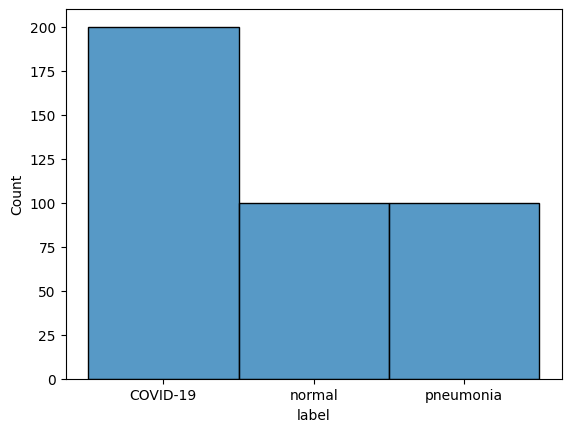

In [13]:
sns.histplot(test_label['label'], discrete=True)

In [29]:
test_label.shape

(400, 4)

In [33]:
test_label['data source'].value_counts()

ricord    200
rsna      200
Name: data source, dtype: int64

In [14]:
test_label['label'].value_counts()

COVID-19     200
normal       100
pneumonia    100
Name: label, dtype: int64

# Images exploration

Let us now explore the images contained in the datsaset

In [54]:
path = 'C:/Users/marco/Desktop/Local_Documents/data/COVIDx-nosplit/train/'
os.chdir(path=path)

(-0.5, 1023.5, 1023.5, -0.5)

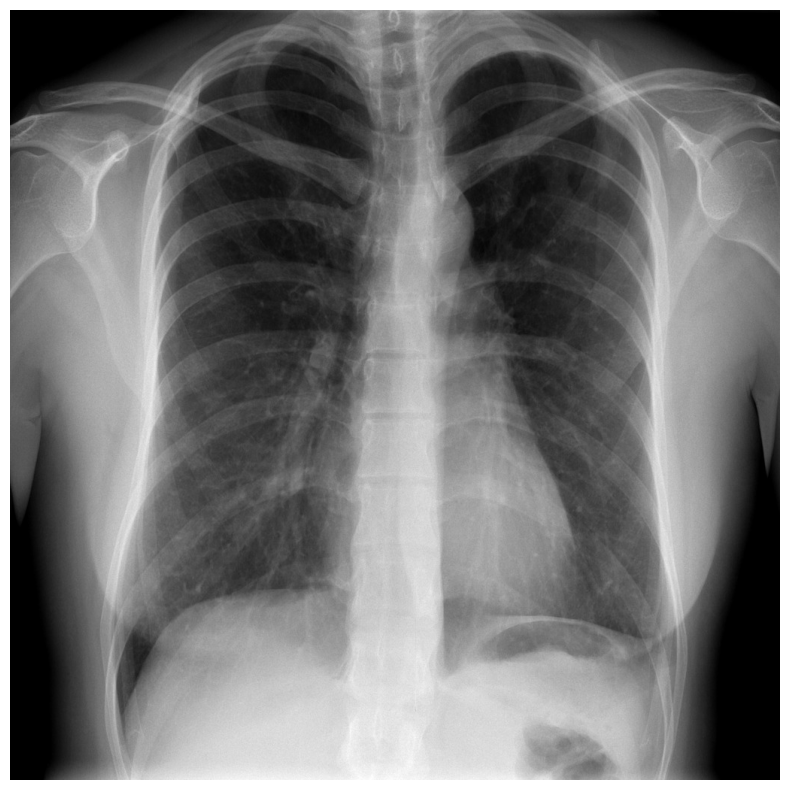

In [113]:
fig, axs = plt.subplots(1, 1)
im = np.float32(cv2.imread(path+'0a41d5c4-83b0-43e4-b98f-be69dcdd4636.png')/255)
plt.imshow(im)
axs.axis('off')

In [109]:
im.shape

(1024, 1024, 3)

The images in the dataset have:
-   size of 1024x1024 
-   three channels 

Let's look at examples for each class:

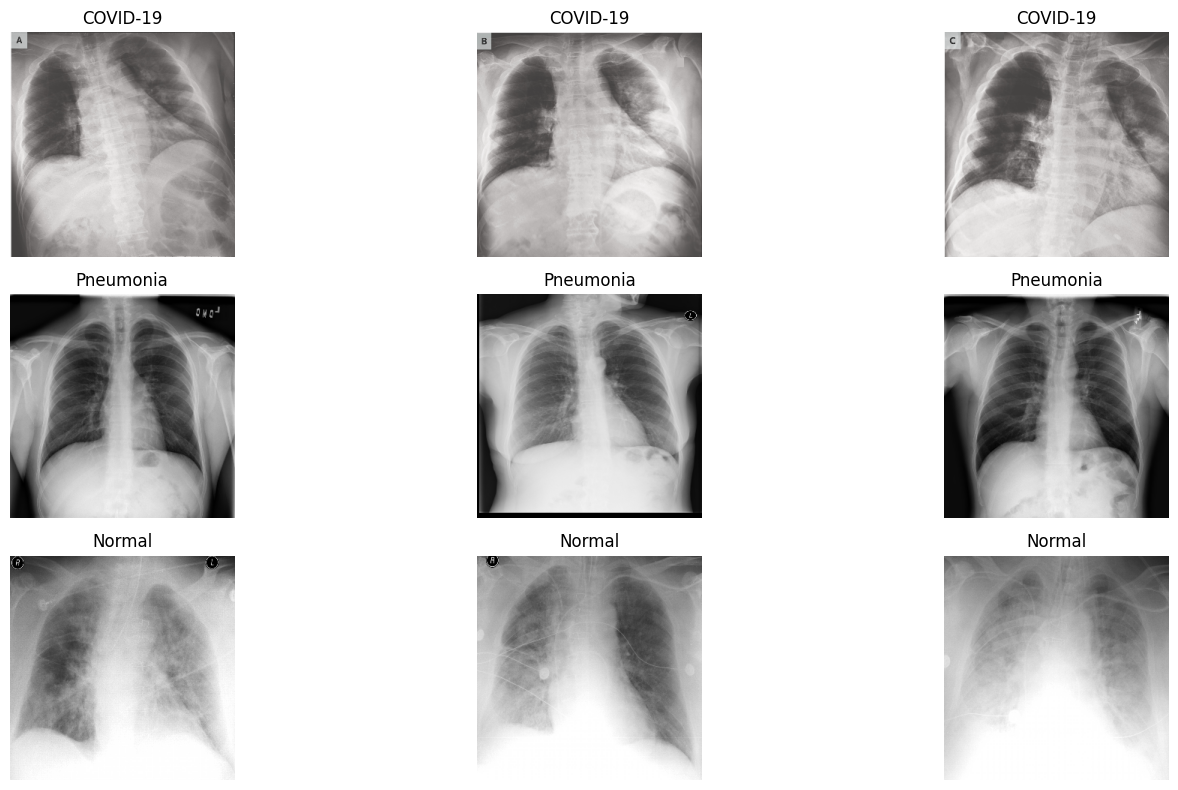

In [106]:
IMG_SIZE = 300
fig, axs = plt.subplots(3, 3, figsize=(16,8))

COVID19_sample = train_label[train_label["label"] == "COVID-19"]["img_path"].head(3).tolist()
normal_sample = train_label[train_label["label"] == "normal"]["img_path"].head(3).tolist()
pneumonia_sample = train_label[train_label["label"] == "pneumonia"]["img_path"].head(3).tolist()
i = 0
j = 0
k = 0
for idx, ax in enumerate(axs.flatten()):
    if (idx < 3):
        img = np.float32(cv2.imread(path+COVID19_sample[i])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("COVID-19")
        i+=1
    elif (idx > 2 and idx < 6):
        img = np.float32(cv2.imread(path+normal_sample[j])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("Pneumonia")
        j+=1
    else:
        img = np.float32(cv2.imread(path+pneumonia_sample[k])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("Normal")
        k+=1

plt.tight_layout()
plt.show()

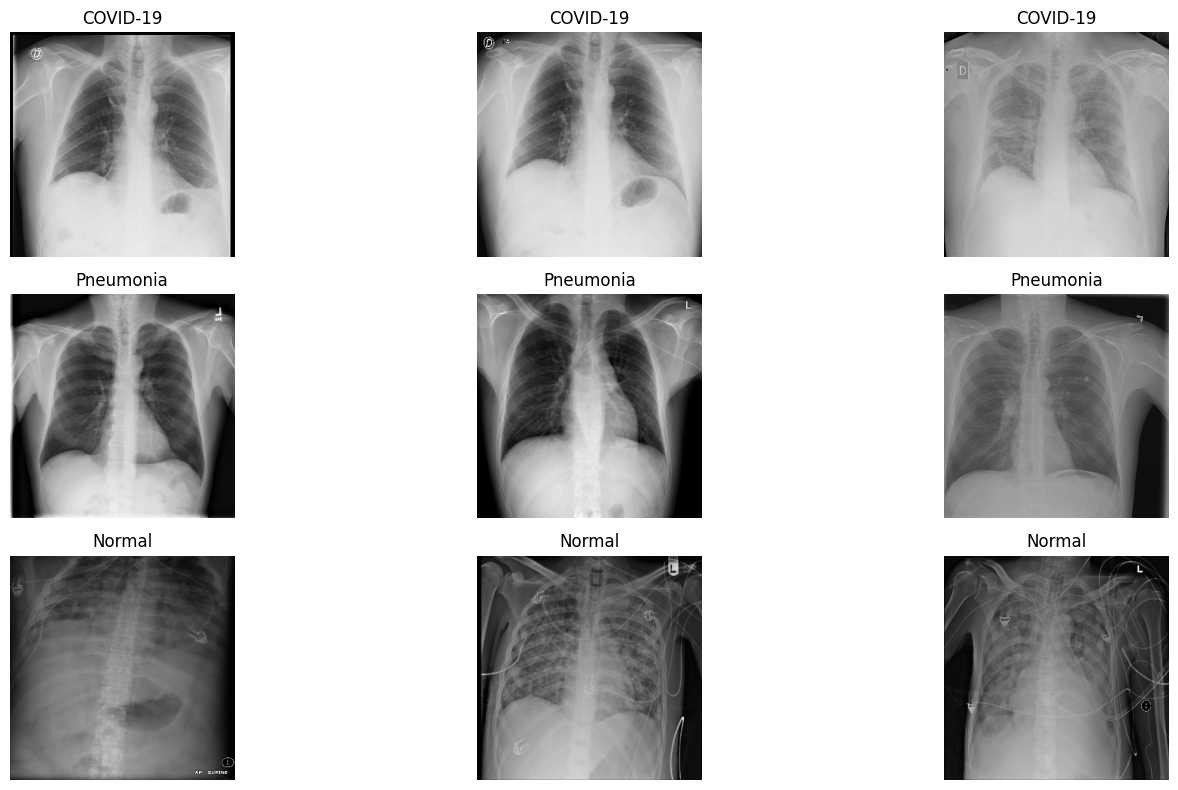

In [107]:
IMG_SIZE = 300
fig, axs = plt.subplots(3, 3, figsize=(16,8))

COVID19_sample = train_label[train_label["label"] == "COVID-19"]["img_path"].tail(3).tolist()
normal_sample = train_label[train_label["label"] == "normal"]["img_path"].tail(3).tolist()
pneumonia_sample = train_label[train_label["label"] == "pneumonia"]["img_path"].tail(3).tolist()
i = 0
j = 0
k = 0
for idx, ax in enumerate(axs.flatten()):
    if (idx < 3):
        img = np.float32(cv2.imread(path+COVID19_sample[i])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("COVID-19")
        i+=1
    elif (idx > 2 and idx < 6):
        img = np.float32(cv2.imread(path+normal_sample[j])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("Pneumonia")
        j+=1
    else:
        img = np.float32(cv2.imread(path+pneumonia_sample[k])/255)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        ax.imshow(img)
        ax.axis("off")
        ax.set_title("Normal")
        k+=1

plt.tight_layout()
plt.show()